## Gather music data of top songs each year through Spotify

In [57]:
import requests
import pandas as pd
import json

url = "https://spotify23.p.rapidapi.com/playlist_tracks/"
headers = {
	"X-RapidAPI-Key": "",
	"X-RapidAPI-Host": "spotify23.p.rapidapi.com"
}

playlist_ids = ["37i9dQZF1DWUZv12GM5cFk", "37i9dQZF1DX9Ol4tZWPH6V", "37i9dQZF1DX0P7PzzKwEKl", "37i9dQZF1DXaW8fzPh9b08", "37i9dQZF1DWTWdbR13PQYH", 
                "37i9dQZF1DWWzQTBs5BHX9", "37i9dQZF1DX1vSJnMeoy3V", "37i9dQZF1DX3j9EYdzv2N9", "37i9dQZF1DWYuGZUE4XQXm", "37i9dQZF1DX4UkKv8ED8jp", 
                "37i9dQZF1DXc6IFF23C9jj", "37i9dQZF1DXcagnSNtrGuJ", "37i9dQZF1DX0yEZaMOXna3", "37i9dQZF1DX3Sp0P28SIer", "37i9dQZF1DX0h0QnLkMBl4", 
                "37i9dQZF1DX9ukdrXQLJGZ", "37i9dQZF1DX8XZ6AUo9R4R", "37i9dQZF1DWTE7dVUebpUW", "37i9dQZF1DXe2bobNYDtW8", "37i9dQZF1DWVRSukIED0e9"]

f = open('top_100_from_2000_to_2019.csv', 'a')
f.write('id,year,top_100_rank,track_name,artist,explicit,duration_ms,popularity,album_name,album_type,release_date,num_tracks_in_album\n')

artist_ids = {}
id = 0
year = 1999

for playlist in playlist_ids:
    querystring = {"id":playlist,"offset":"0","limit":"100"}
    response = requests.request("GET", url, headers=headers, params=querystring)

    year += 1
    rank = 0

    for item in json.loads(response.text)['items']:
        id += 1
        rank += 1
        name = item['track']['name']
        artist = item['track']['artists'][0]['name']
        if item['track']['artists'][0]['id'] not in artist_ids:
            artist_ids[item['track']['artists'][0]['id']] = artist
        explicit = item['track']['explicit']
        duration_ms = item['track']['duration_ms']
        popularity = item['track']['popularity']
        album = item['track']['album']['name']
        album_type = item['track']['album']['album_type']
        release_date = item['track']['album']['release_date']
        num_tracks = item['track']['album']['total_tracks']
        f.write("{},{},{},\"{}\",\"{}\",{},{},{},\"{}\",{},{},{}\n".format(id, year, rank, name, artist, explicit, duration_ms, popularity, 
                                                                           album.replace('"', ''), album_type, release_date, num_tracks))
f.close()

# saving spotify artist ids to gather info like artist genres if we have time
f = open('artist_ids.csv', 'a')
f.write('artist,id\n')
for key in artist_ids:
    f.write('{},{}\n'.format(artist_ids[key], key))
f.close()

## Preview of dataframe created from Spotify data

In [59]:
music_df = pd.read_csv('top_100_from_2000_to_2019.csv')
music_df

,id,year,top_100_rank,track_name,artist,explicit,duration_ms,popularity,album_name,album_type,release_date,num_tracks_in_album
0,1,2000,1,Oops!...I Did It Again,Britney Spears,False,211160,74,Oops!... I Did It Again,album,2000-05-16,12
1,2,2000,2,All The Small Things,blink-182,False,167066,77,Enema Of The State,album,1999-06-01,12
2,3,2000,3,Breathe,Faith Hill,False,250546,63,Breathe,album,1999-11-09,13
3,4,2000,4,It's My Life,Bon Jovi,False,224493,76,Crush,album,2000-01-01,12
4,5,2000,5,Bye Bye Bye,*NSYNC,False,200400,67,No Strings Attached,album,2000-03-21,12
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,2019,96,Motivation,Normani,False,193837,66,Motivation,single,2019-08-16,1
1996,1997,2019,97,Lost Without You,Freya Ridings,False,225853,65,Freya Ridings,album,2019-07-19,12
1997,1998,2019,98,Ladbroke Grove,AJ Tracey,False,190537,65,AJ Tracey,album,2019-02-08,15
1998,1999,2019,99,Clout (feat. Cardi B),Offset,True,205803,65,FATHER OF 4,album,2019-02-22,16


## Is the popularity of a song and its duration correlated?

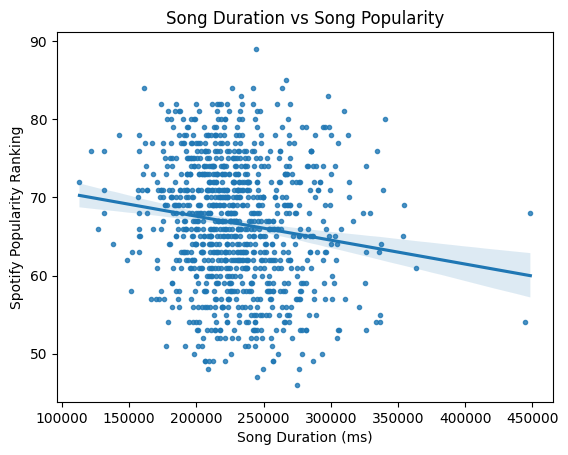

Pearson correlation coefficient:  -0.11654592248387806
p value:  1.7260550388158932e-07


In [155]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

music_1 = music_df.copy()
plt.figure()
sns.regplot(data=music_1.sample(frac=0.5), x='duration_ms', y='popularity', marker='.')
plt.title('Song Duration vs Song Popularity')
plt.xlabel('Song Duration (ms)')
plt.ylabel('Spotify Popularity Ranking')
plt.show()

(r, p) = stats.pearsonr(music_1.popularity, music_1.duration_ms)
print('Pearson correlation coefficient: ', r)
print('p value: ', p)

## Grouped by year

<AxesSubplot: xlabel='popularity', ylabel='duration_ms'>

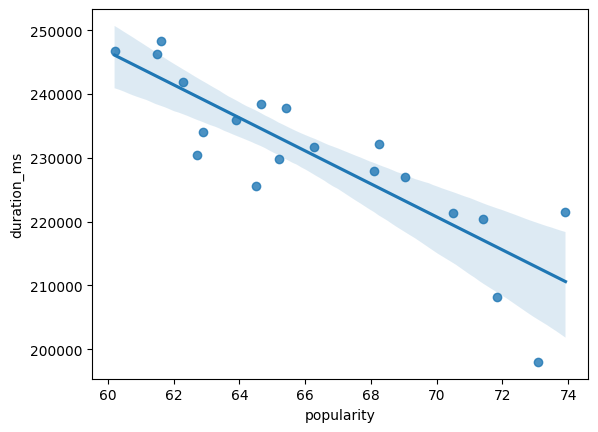

In [161]:
spot = pd.read_csv('top_100_from_2000_to_2019.csv')
sp = spot.groupby('year').agg({'popularity':'mean','duration_ms':'mean','num_tracks_in_album':'mean'}).reset_index()

sns.regplot(data=sp, x="popularity",y="duration_ms")

In [162]:
(r,p) = stats.pearsonr(sp['popularity'], sp['duration_ms'])
print('r =', r, 'p =', p)

r = -0.8592084479937527 p = 1.224343614707909e-06


## Song duration vs number of tracks in album

<AxesSubplot: xlabel='popularity', ylabel='num_tracks_in_album'>

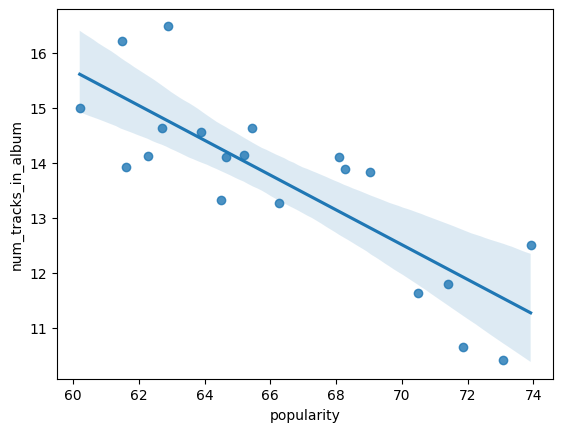

In [163]:
sns.regplot(data=sp, x="popularity",y="num_tracks_in_album")

In [164]:
(r,p) = stats.pearsonr(sp['popularity'], sp['num_tracks_in_album'])
print('r =', r, 'p =', p)

r = -0.8211089364284496 p = 9.124705002736787e-06


## Have explicit songs become more or less common in the top 100? 

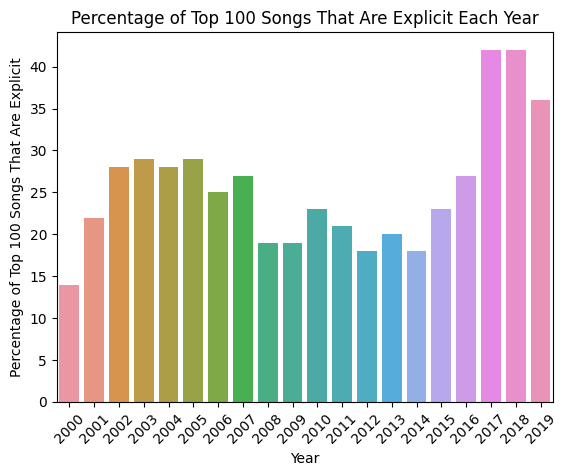

Pearson correlation coefficient:  0.41955602917194124
p value:  0.0655432083425624


In [154]:
music_2 = music_df.copy()
music_2.explicit = music_2.explicit.astype('int')
# can use count of explicit songs each year as a percentage because each year has exactly 100 songs
music_2 = music_2.groupby('year', as_index=False).agg({'year':'first', 'explicit':'sum'})

plt.figure()
sns.barplot(data=music_2, x='year', y='explicit')
plt.xticks(rotation=45, fontsize=10)
plt.title('Percentage of Top 100 Songs That Are Explicit Each Year')
plt.xlabel('Year')
plt.ylabel('Percentage of Top 100 Songs That Are Explicit')
plt.show()

(r, p) = stats.pearsonr(music_2.year, music_2.explicit)
print('Pearson correlation coefficient: ', r)
print('p value: ', p)

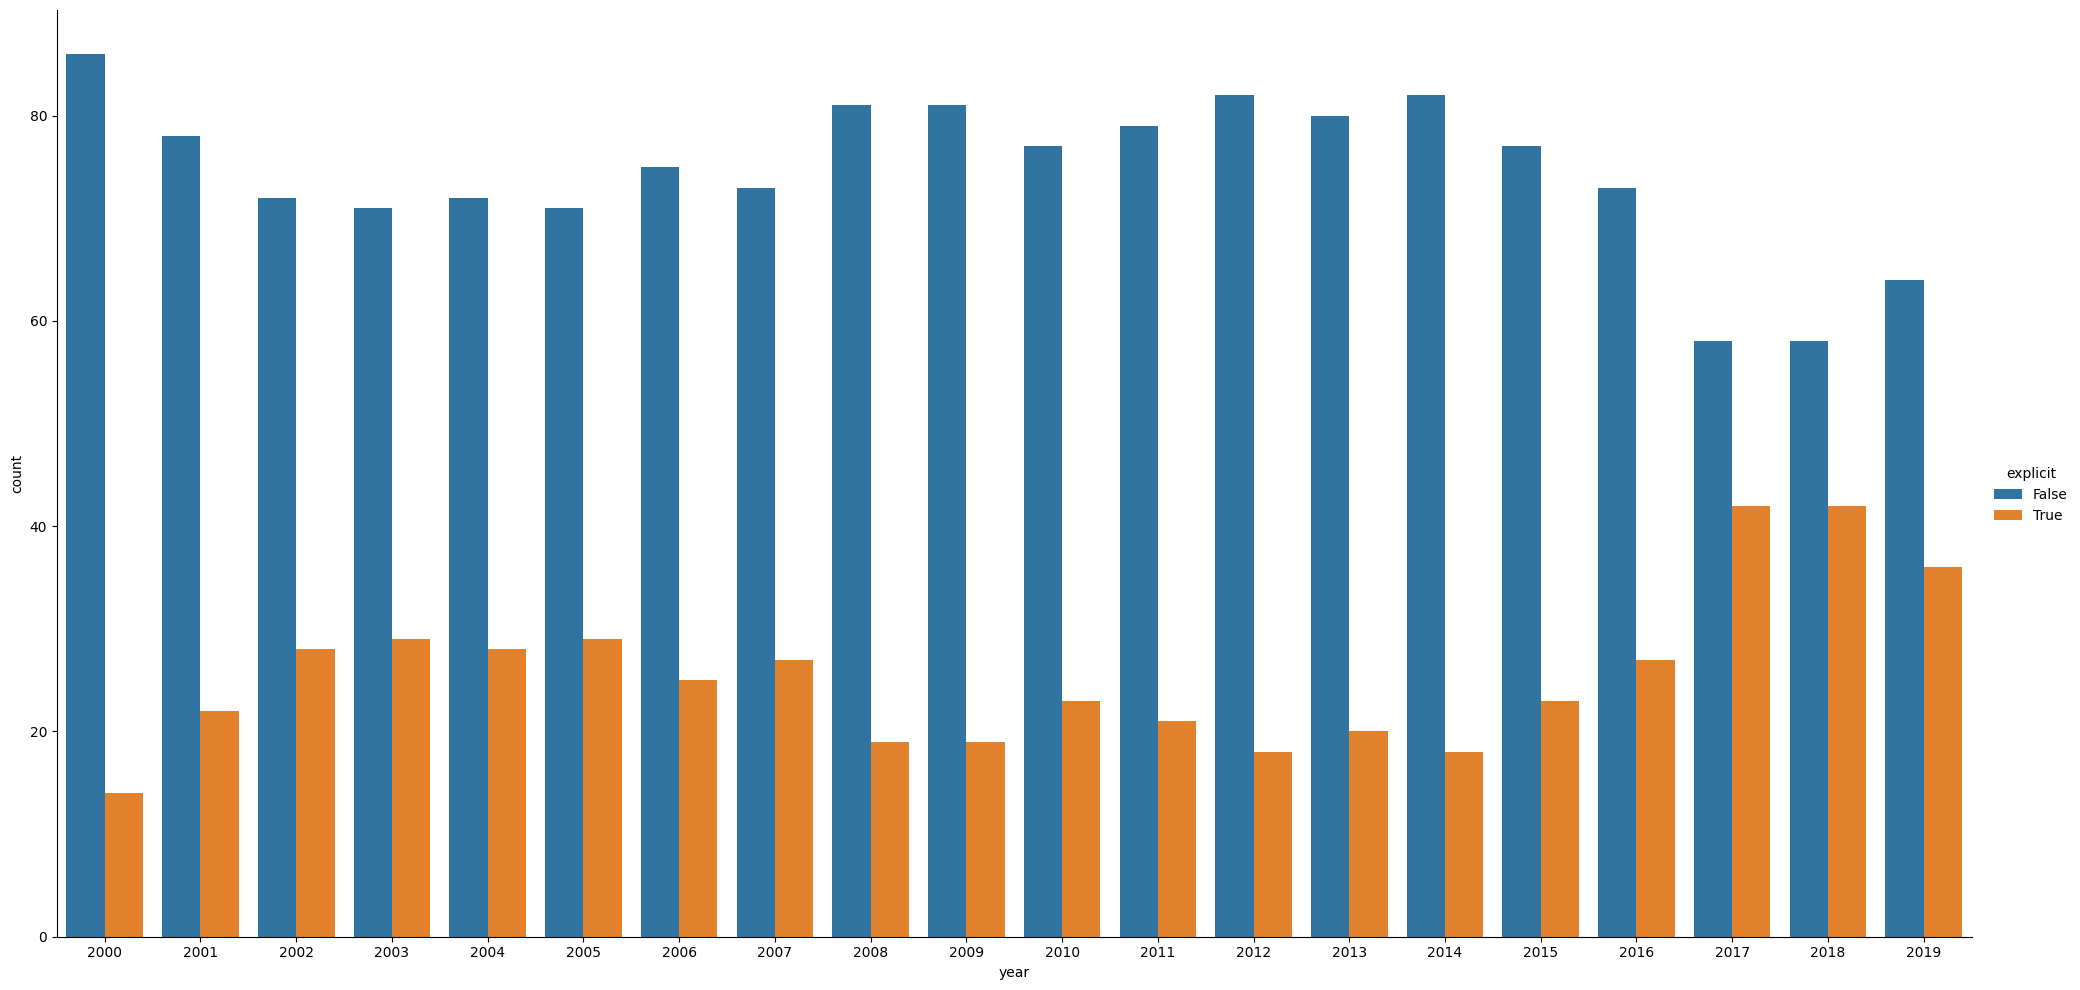

In [165]:
catspot = sns.catplot(x='year', hue='explicit', data=spot, kind='count', height=10, aspect=2)

## Have singles become more or less common in the top 100?

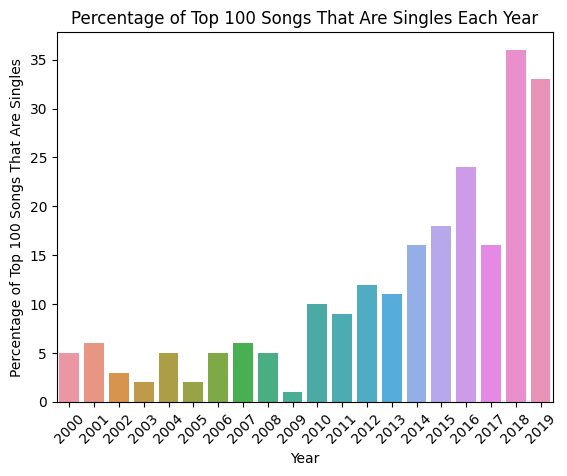

Pearson correlation coefficient:  0.8380961078163259
p value:  3.970191461916066e-06


In [160]:
music_3 = music_df.copy()
single_ids = music_3[music_3.album_type == 'single'].id
music_3 = music_3[music_3.id.isin(single_ids)]
music_3['singles_count'] = 1
# can use count of singles each year as a percentage becuase there are exactly 100 songs for each year
music_3 = music_3.groupby('year', as_index=False).agg({'year':'first', 'singles_count':'sum'})

plt.figure()
sns.barplot(data=music_3, x='year', y='singles_count')
plt.xticks(rotation=45, fontsize=10)
plt.title('Percentage of Top 100 Songs That Are Singles Each Year')
plt.xlabel('Year')
plt.ylabel('Percentage of Top 100 Songs That Are Singles')
plt.show()

(r, p) = stats.pearsonr(music_3.year, music_3.singles_count)
print('Pearson correlation coefficient: ', r)
print('p value: ', p)

## Song duration vs rank

<AxesSubplot: xlabel='duration_ms', ylabel='top_100_rank'>

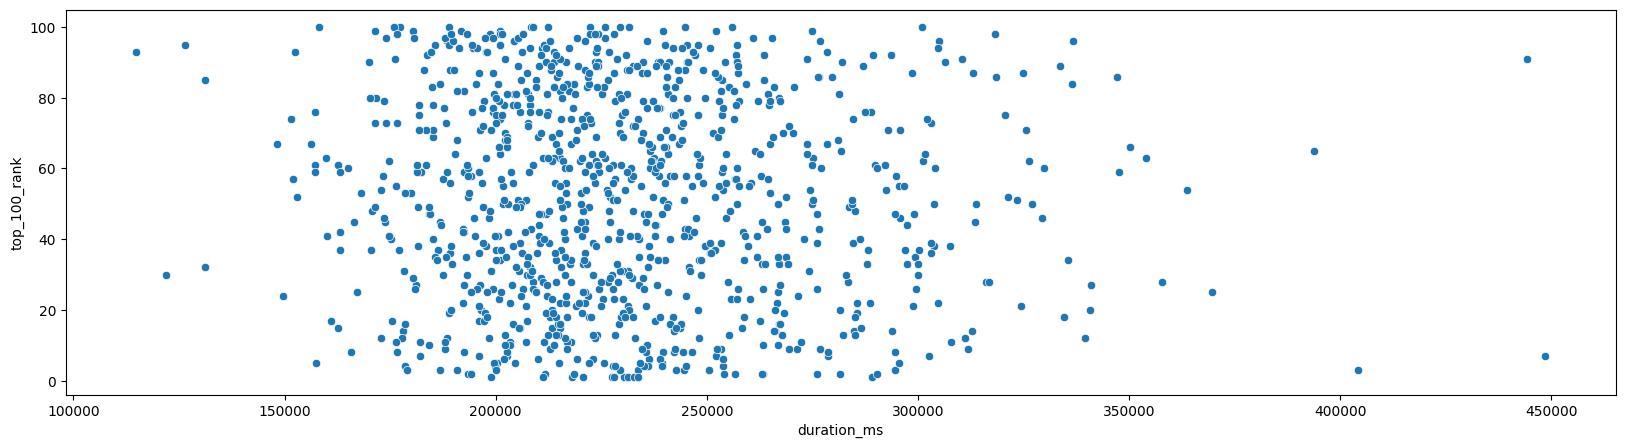

In [166]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.scatterplot(x='duration_ms',y='top_100_rank',data = spot.sample(frac=0.5))

## Song duration vs popularity

<AxesSubplot: xlabel='duration_ms', ylabel='popularity'>

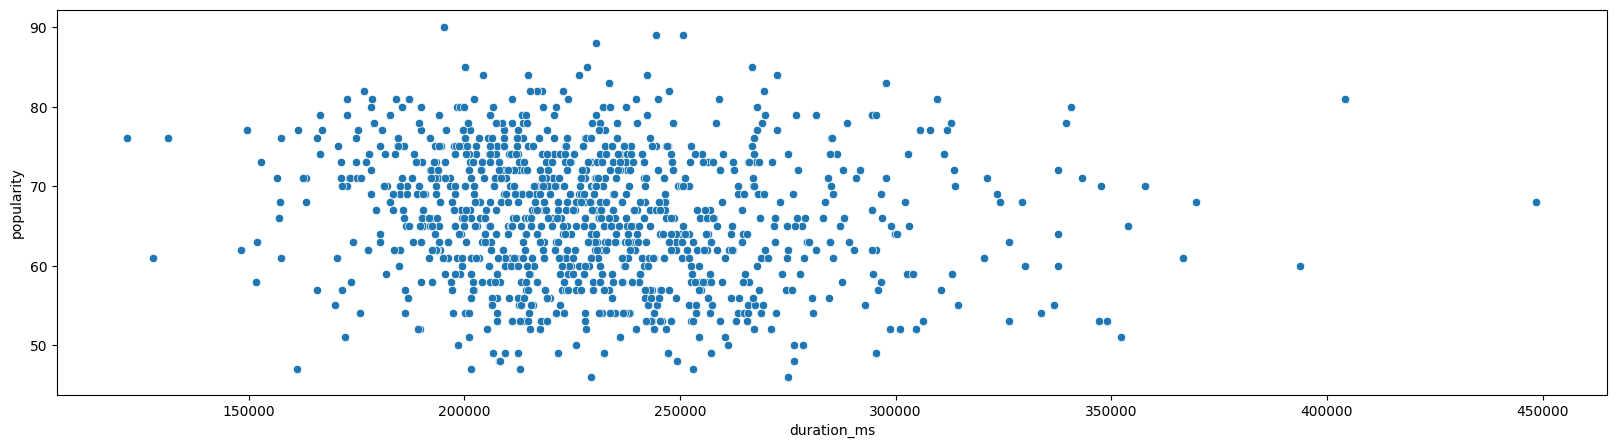

In [167]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.scatterplot(x='duration_ms',y='popularity',data = spot.sample(frac=0.5))

## Popularity and album type (T-test)

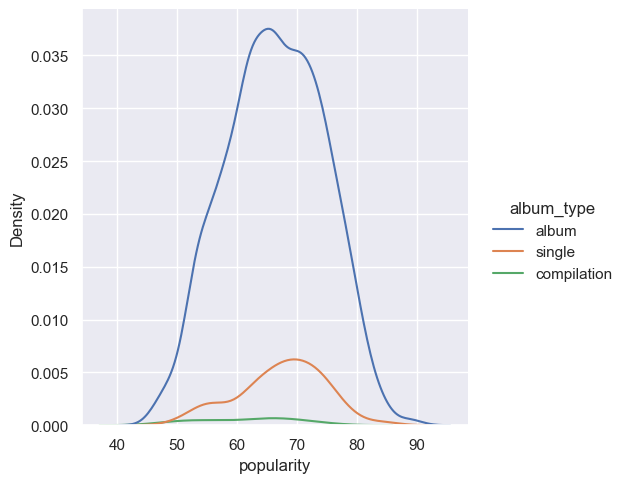

In [168]:
sns.set(rc={"figure.figsize": (15, 8)})
sns.displot(data=spot, x='popularity', hue='album_type', kind='kde')

## T-test between album popularity and compilation popularity

In [169]:
display(stats.ttest_ind(spot[spot.album_type == 'album'].popularity, spot[spot.album_type == 'compilation'].popularity))

Ttest_indResult(statistic=3.189054889177136, pvalue=0.0014523138238968284)

## T-test between album popularity and single popularity

In [170]:
display(stats.ttest_ind(spot[spot.album_type == 'album'].popularity, spot[spot.album_type == 'single'].popularity))

Ttest_indResult(statistic=-1.8590935618173179, pvalue=0.06316303833064124)

## T-test between single popularity and compilation popularity

In [171]:
display(stats.ttest_ind(spot[spot.album_type == 'single'].popularity, spot[spot.album_type == 'compilation'].popularity))

Ttest_indResult(statistic=4.134447073498932, pvalue=4.843306324924051e-05)